In [1]:
import osmnx as ox
import networkx as nx
import random
import math
import pandas as pd
import matplotlib.pyplot as plt          
import numpy as np
import seaborn as sns

In [ ]:
=State-of-Art Growth patterns=============================================

##### Uber trips in NYC declines from March to July 2019 due to new minimum wage rule (https://www.businessinsider.com/uber-lyft-rides-decline-after-new-york-minimum-wage-2019-7?IR=T). Indeed, Uber needed to make more money to pay its drivers, so it increased the trip fares, this decreased the number of travellers and consequently the number of drivers.The next massive drop is because of Covid. 

In [2]:
def smooth(y,w=17,o=1,d=2):
    from scipy.signal import savgol_filter
    nans = [float('nan') for i in range(0,d)] 
    y = nans + list(savgol_filter(y[d:],w,o))
    for i in range(0,len(y)):
        if y[i]<0:
            y[i] = 0
    return y

In [40]:
# import data
nyc = pd.read_csv('data/Uber_NYC_2012-2022.csv')
nyc.date = nyc.apply(lambda row: pd.Timestamp(row.date), axis=1)
nyc.at[0,'date'] = pd.Timestamp('2012-07-01')

mi = pd.read_csv('data/Uber_Miami.csv')
mi.date = mi.apply(lambda row: pd.Timestamp(row.date), axis=1)

sea = pd.read_csv('data/Uber_Seattle.csv')
sea.date = sea.apply(lambda row: pd.Timestamp(row.date), axis=1)

ams = pd.read_csv('data/Uber_Ams_2016-2022.csv')
ams.date = ams.apply(lambda row: pd.Timestamp(row.date), axis=1)

arjan = pd.read_csv('data/Arjan_supply.csv')
arjan.date = arjan.apply(lambda row: pd.Timestamp(row.date), axis=1)

djavadian = pd.read_csv('data/Djavadian_supply.csv')
djavadian.date = djavadian.apply(lambda row: pd.Timestamp(row.date), axis=1)

ertz = pd.read_csv('data/Ertz_supply.csv')
ertz.date = ertz.apply(lambda row: pd.Timestamp(row.date), axis=1)

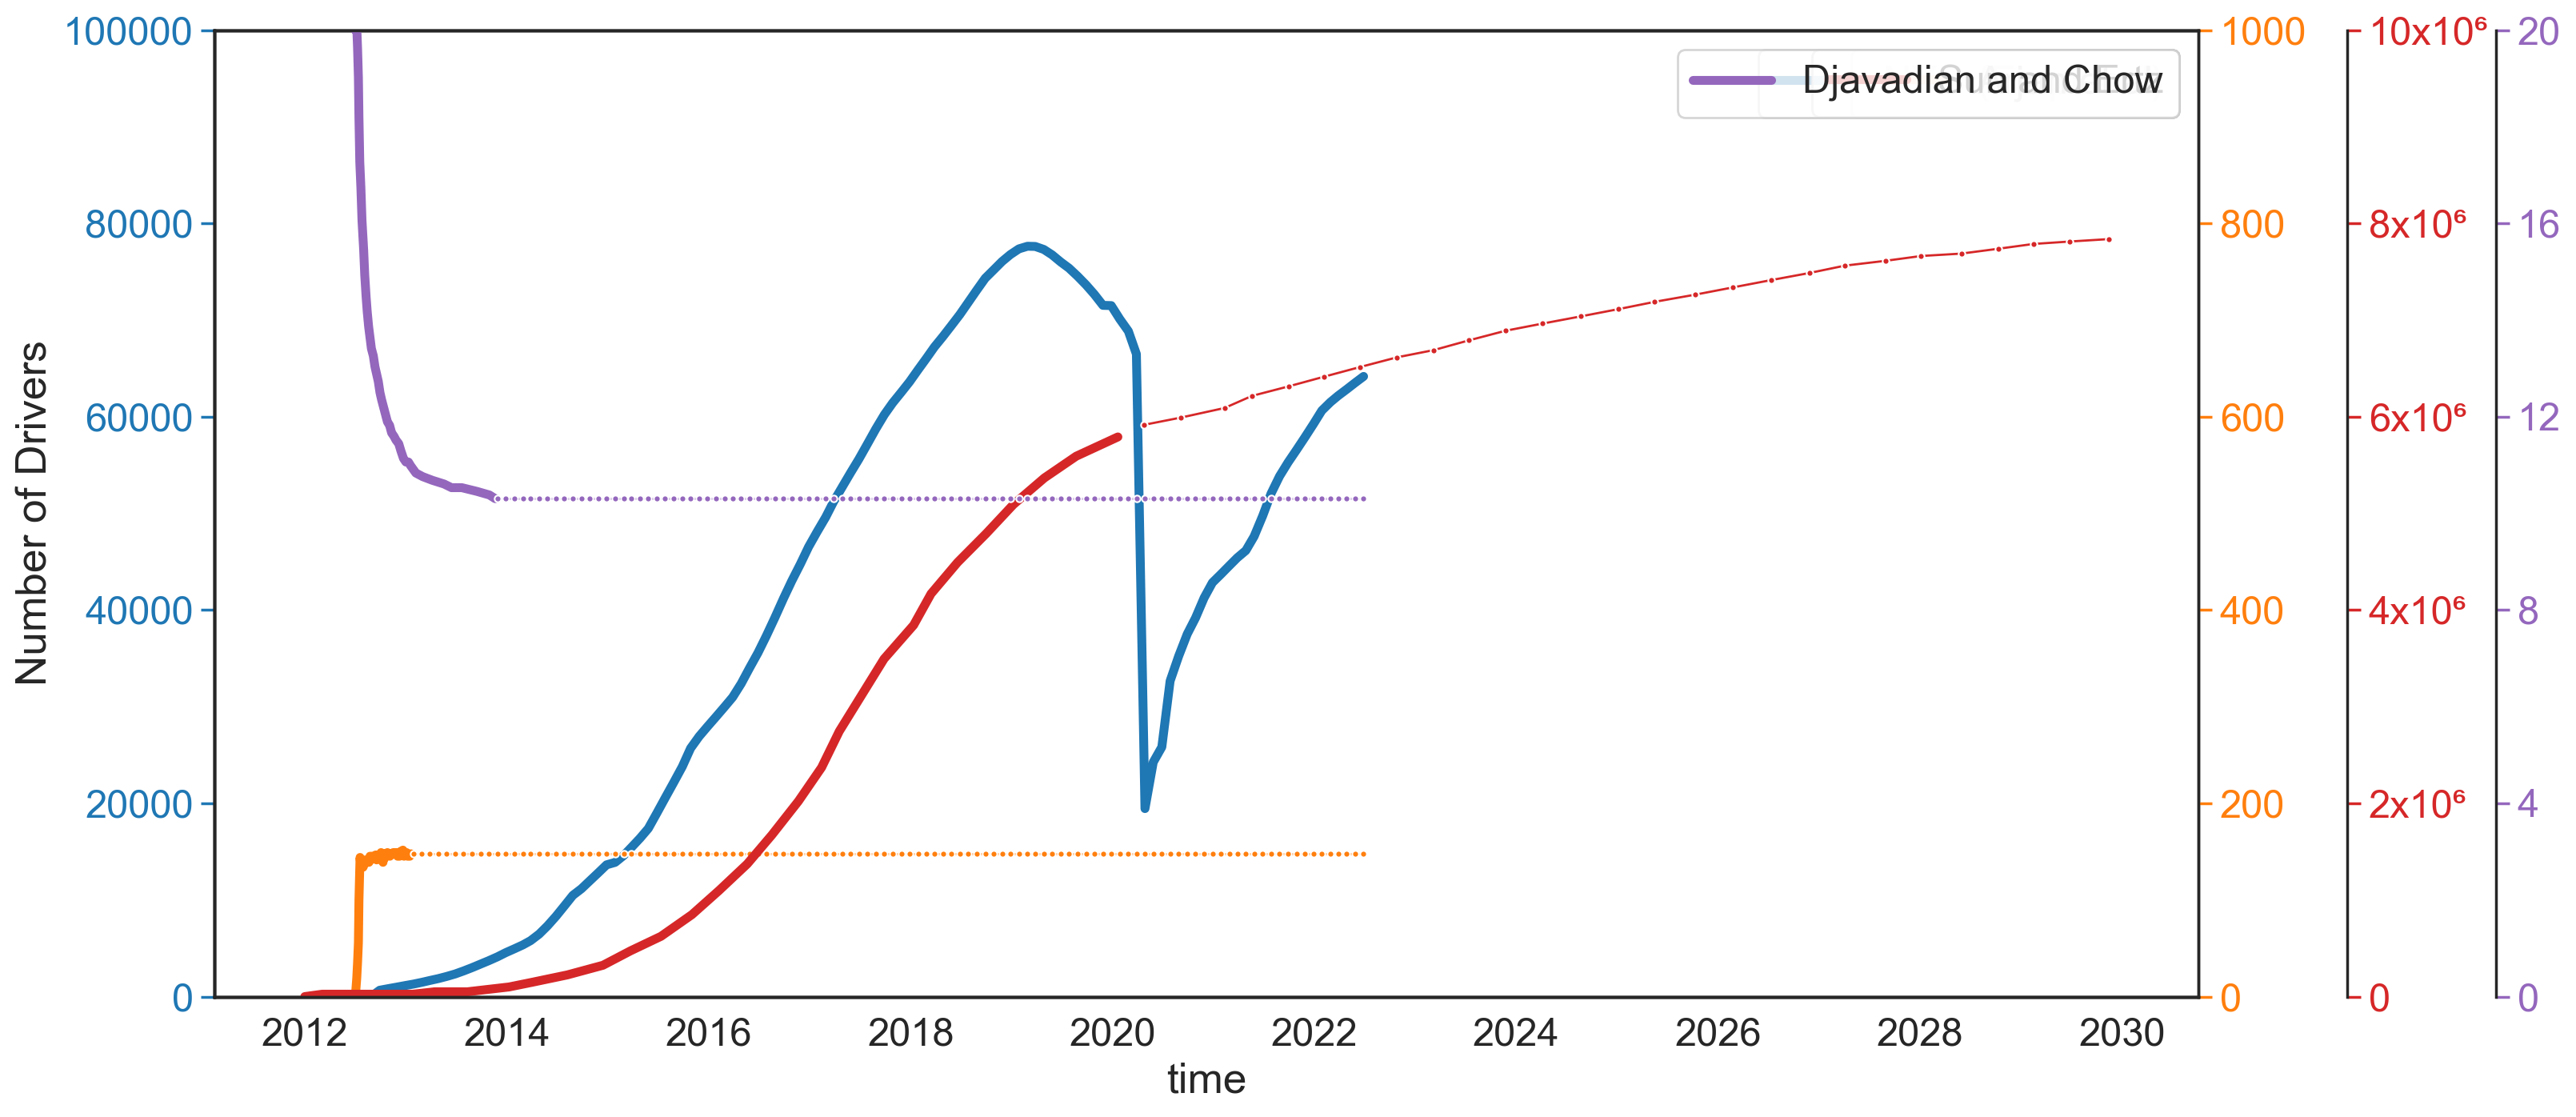

In [538]:
sns.set(rc={"figure.dpi":200, 'savefig.dpi':200})
sns.set(palette='tab10',font_scale=1.6)#, rc={'axes.facecolor':'lightblue', 'figure.facecolor':'lightgreen'},)
sns.set_style('white')
fig, ax = plt.subplots(nrows=1, figsize=(16,8))
# sns.despine(left=True)

#---------------------NYC-------------------------------------------
nyc_max = nyc['Unique Dispatched Vehicles'].max()
nyc_smoothed = smooth(nyc['Unique Dispatched Vehicles'])
nyc_y = nyc_smoothed[0:89]+list(nyc[89:97]['Unique Dispatched Vehicles'])+nyc_smoothed[97:]
# nyc_y = [0 if math.isnan(y) else y/nyc_max*100*0.7 for y in nyc_y]
nyc_y = [0 if math.isnan(y) else y for y in nyc_y]
# nyc_x = [x for x in range(1,len(nyc_y)+1)]
c1 = 'C0'
sns.lineplot(x=nyc.date, y=nyc_y,lw=4, label = 'NYC (Empirical)', color=c1)
ax.set(xlabel='time', ylabel='Number of Drivers', ylim=(0,100000))
ax.tick_params(axis='y', colors=c1)

#--------------------Arjan----------------------------------------------------
ax2 = ax.twinx()
c2 = 'C1'
sns.lineplot(x=arjan.date, y=arjan.number_of_drivers,lw=4, label = 'Arjan et al.', color=c2)
sns.lineplot(x=nyc.loc[6:].date, y=147.727,lw=1, color=c2, marker = '.')
ax2.set(xlabel='time',ylabel='', ylim=(0,1000))
ax2.tick_params(axis='y', colors=c2)
# ax11.grid(b=None)

#---------------------Ertz-------------------------------------------------
ax3 = ax.twinx()
c3 = 'C3'
sns.lineplot(x=ertz.loc[0:29].date, y=ertz.loc[0:29].number_of_drivers,lw=4, label = 'Sun and Ertz', color=c3)
sns.lineplot(x=ertz.loc[30:].date, y=ertz.loc[30:].number_of_drivers,lw=1, color=c3, marker = '.')
ax3.set(xlabel='time',ylabel='', ylim=(0,10))
ax3.spines.right.set_position(("axes", 1.075))
ax3.tick_params(axis='y', colors=c3)
ax3.set_yticklabels([0, '2x10\N{SUPERSCRIPT six}', '4x10\N{SUPERSCRIPT six}', '6x10\N{SUPERSCRIPT six}',
                     '8x10\N{SUPERSCRIPT six}', '10x10\N{SUPERSCRIPT six}'])

#---------------------Djavadian-------------------------------------------------
ax4 = ax.twinx()
c4 = 'C4'
sns.lineplot(x=djavadian.date, y=djavadian.number_of_drivers,lw=4, label = 'Djavadian and Chow', color=c4)
sns.lineplot(x=nyc.loc[16:].date, y=10.3030,lw=1, color=c4, marker = '.')
ax4.set(xlabel='time',ylabel='', ylim=(0,20))
ax4.spines.right.set_position(("axes", 1.15))
ax4.set_yticks([0,4,8,12,16,20])
ax4.tick_params(axis='y', colors=c4)
#--------------------------------------------------------------------------
# lines, labels = ax[1][1].get_legend_handles_labels()
# lines2, labels2 = ax11.get_legend_handles_labels()
# ax[1][1].legend(lines + lines2, labels + labels2,framealpha=1, loc=(0.73,0.6))
# ax11.legend().remove()
# ax2.spines['right'].set_color('C7')
# ax2.tick_params(axis='y', colors='C7')
# ax2.yaxis.label.set_color('C7')

# sns.despine(left=True)


In [ ]:
=======================================================================

In [41]:
nyc = nyc.loc[0:88]
ertz = ertz.loc[2:29]
ams = ams[:47]

In [42]:
yms = [0.0,
 0.005,
 0.007,
 0.011,
 0.022,
 0.016,
 0.025,
 0.029,
 0.019,
 0.028,
 0.024,
 0.028,
 0.03,
 0.019,
 0.031,
 0.037,
 0.033,
 0.035,
 0.045,
 0.029,
 0.04,
 0.033,
 0.032,
 0.045,
 0.024,
 0.029,
 0.036,
 0.045,
 0.031,
 0.028,
 0.044,
 0.029,
 0.035,
 0.044,
 0.047,
 0.05,
 0.048,
 0.043,
 0.055,
 0.038,
 0.033,
 0.045,
 0.045,
 0.042,
 0.045,
 0.031,
 0.06,
 0.04,
 0.04,
 0.042,
 0.041,
 0.038,
 0.045,
 0.031,
 0.051,
 0.04,
 0.04,
 0.049,
 0.045,
 0.043,
 0.043,
 0.043,
 0.044,
 0.045,
 0.034,
 0.043,
 0.036,
 0.04,
 0.05,
 0.037,
 0.038,
 0.051,
 0.035,
 0.047,
 0.048,
 0.042,
 0.05,
 0.048,
 0.049,
 0.055,
 0.049,
 0.047,
 0.045,
 0.044,
 0.041,
 0.054,
 0.052,
 0.05,
 0.042,
 0.035,
 0.034,
 0.057,
 0.04,
 0.054,
 0.044,
 0.046,
 0.039,
 0.044,
 0.052,
 0.045,
 0.053,
 0.033,
 0.045,
 0.045,
 0.035,
 0.04,
 0.036,
 0.049,
 0.045,
 0.035,
 0.037,
 0.043,
 0.054,
 0.051,
 0.044,
 0.041,
 0.043,
 0.058,
 0.052,
 0.047,
 0.046,
 0.054,
 0.062,
 0.058,
 0.049,
 0.05,
 0.046,
 0.054,
 0.056,
 0.05,
 0.059,
 0.056,
 0.053,
 0.054,
 0.054,
 0.063,
 0.061,
 0.058,
 0.069,
 0.062,
 0.081,
 0.067,
 0.077,
 0.057,
 0.062,
 0.061,
 0.066,
 0.063,
 0.072,
 0.066,
 0.069,
 0.07,
 0.069,
 0.062,
 0.056,
 0.081,
 0.068,
 0.071,
 0.077,
 0.078,
 0.086,
 0.084,
 0.083,
 0.077,
 0.097,
 0.081,
 0.071,
 0.094,
 0.084,
 0.088,
 0.092,
 0.082,
 0.097,
 0.081,
 0.093,
 0.089,
 0.091,
 0.086,
 0.1,
 0.096,
 0.086,
 0.083,
 0.099,
 0.095,
 0.082,
 0.111,
 0.106,
 0.099,
 0.1,
 0.098,
 0.076,
 0.106,
 0.094,
 0.1,
 0.117,
 0.117,
 0.117,
 0.107,
 0.109,
 0.107,
 0.115,
 0.109,
 0.117,
 0.114,
 0.121,
 0.126,
 0.121,
 0.132,
 0.113,
 0.129,
 0.118,
 0.128,
 0.11,
 0.129,
 0.12,
 0.116,
 0.115,
 0.136,
 0.135,
 0.147,
 0.136,
 0.131,
 0.14,
 0.127,
 0.127,
 0.14,
 0.137,
 0.15,
 0.148,
 0.149,
 0.15,
 0.145,
 0.167,
 0.145,
 0.142,
 0.153,
 0.148,
 0.172,
 0.157,
 0.151,
 0.164,
 0.175,
 0.155,
 0.163,
 0.168,
 0.164,
 0.176,
 0.168,
 0.172,
 0.178,
 0.16,
 0.172,
 0.175,
 0.186,
 0.166,
 0.183,
 0.189,
 0.169,
 0.173,
 0.19,
 0.193,
 0.19,
 0.201,
 0.185,
 0.184,
 0.191,
 0.203,
 0.191,
 0.193,
 0.184,
 0.189,
 0.202,
 0.194,
 0.205,
 0.198,
 0.213,
 0.21,
 0.212,
 0.212,
 0.224,
 0.213,
 0.196,
 0.199,
 0.194,
 0.226,
 0.216,
 0.204,
 0.221,
 0.22,
 0.221,
 0.239,
 0.237,
 0.225,
 0.23,
 0.236,
 0.22,
 0.26,
 0.238,
 0.231,
 0.223,
 0.236,
 0.229,
 0.243,
 0.253,
 0.248,
 0.239,
 0.267,
 0.226,
 0.243,
 0.232,
 0.242,
 0.242,
 0.242,
 0.233,
 0.265,
 0.268,
 0.261,
 0.248,
 0.241,
 0.241,
 0.268,
 0.262,
 0.26,
 0.271,
 0.254,
 0.27,
 0.275,
 0.301,
 0.257,
 0.263,
 0.263,
 0.276,
 0.28,
 0.29,
 0.295,
 0.267,
 0.285,
 0.283,
 0.29,
 0.261,
 0.27,
 0.285,
 0.295,
 0.273,
 0.283,
 0.287,
 0.292,
 0.287,
 0.294,
 0.294,
 0.288,
 0.29,
 0.304,
 0.293,
 0.292,
 0.307,
 0.309,
 0.292,
 0.297,
 0.319]

In [43]:
import datetime

base = pd.Timestamp('2012-07-01')
n_days = 360
step = 7.6 #7.6
# calculating timestamps for the next 10 days
timestamp_list = [base + datetime.timedelta(days=step*x) for x in range(n_days)]
me = pd.DataFrame()
me['supply_share'] =yms# smooth(yms, w=35)
me['date'] = timestamp_list

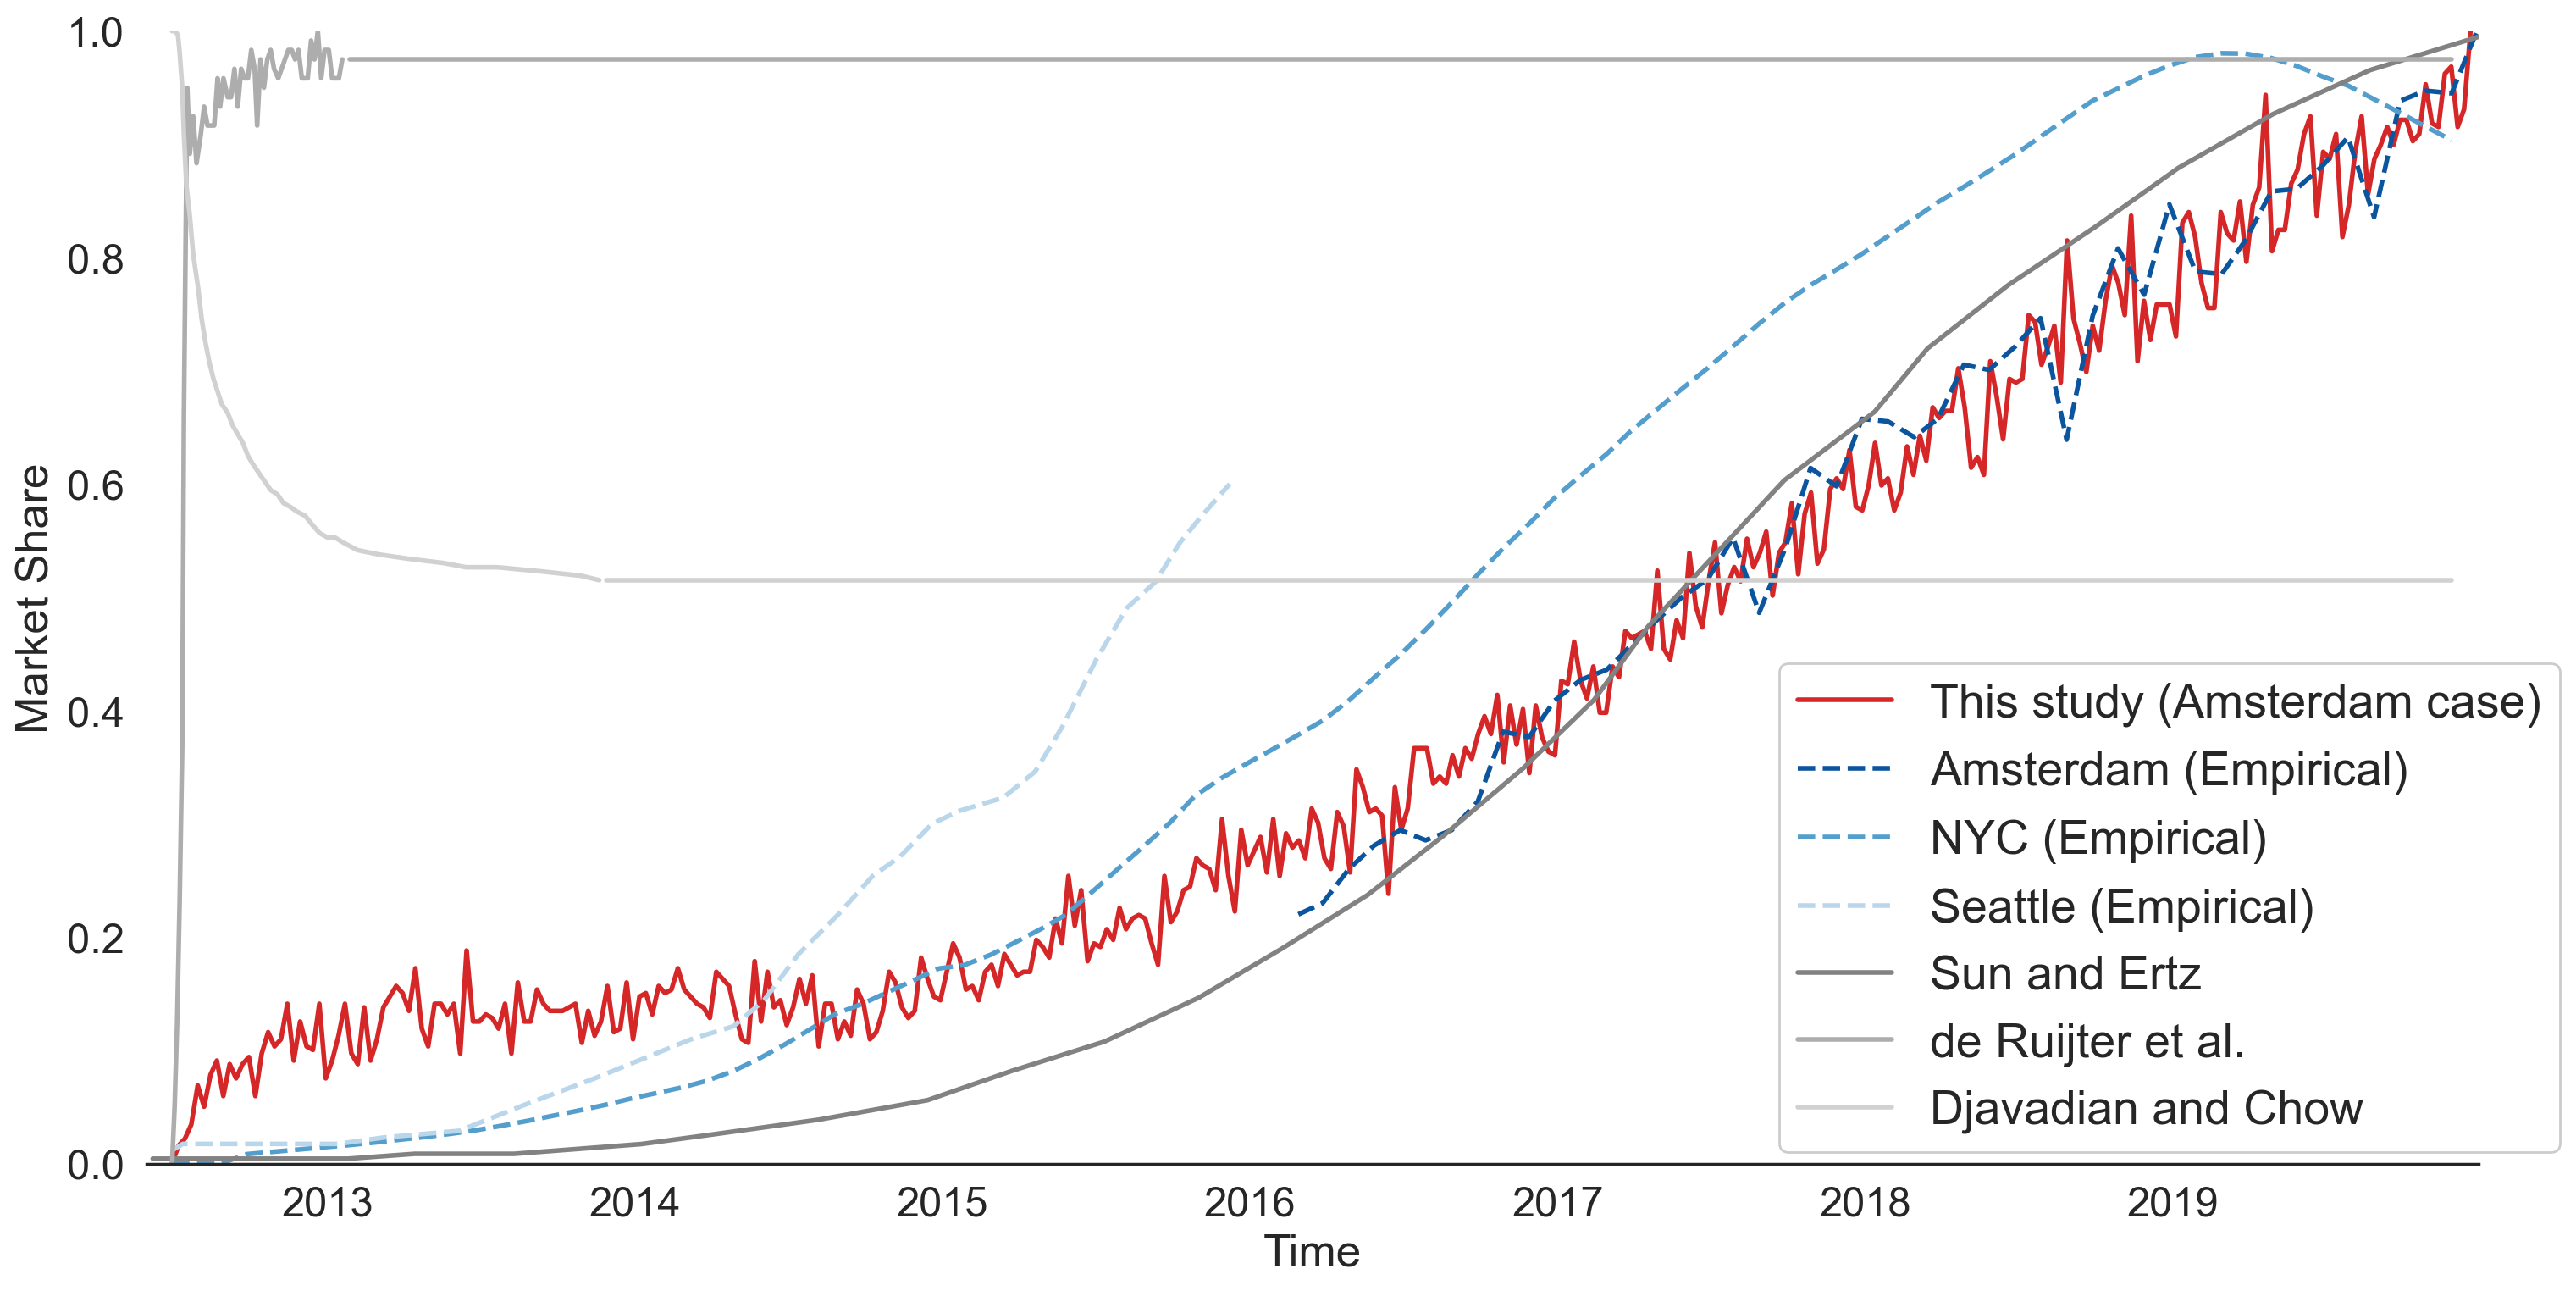

In [71]:
# Here we use min-max scaling or normalization: https://www.linkedin.com/advice/1/what-pros-cons-different-scaling-methods-data-normalization#:~:text=Data%20normalization%20and%20scaling%20can%20be%20achieved%20through%20several%20methods,dividing%20by%20the%20maximum%20value.

sns.set(rc={"figure.dpi":200, 'savefig.dpi':200})
sns.set(palette='tab10',font_scale=1.6)#, rc={'axes.facecolor':'lightblue', 'figure.facecolor':'lightgreen'},)
sns.set_style('white')
fig, ax = plt.subplots(nrows=1, figsize=(16,8))
sns.despine(left=True)

blues = sns.color_palette("Blues")
greys = sns.color_palette("Greys")
#Us-----------------------------------------------------------------------
me_max = me.supply_share.max()
me_last_v = me.supply_share[len(me)-1]
sns.lineplot(x=me.date, y=me.supply_share/me_max,lw=2, label = 'This study (Amsterdam case)', color='C3')

#Empirical-----------------------------------------------------------------------
ams_max = ams['Number_of_drivers'].max()
ams_y =ams['Number_of_drivers']# smooth(ams['Number_of_drivers'], w=9)
ams_y = [0 if math.isnan(y) else y/ams_max for y in ams_y]
ams_y[0] = 0.22; ams_y[1] = 0.23
sns.lineplot(x=ams.date, y=ams_y,lw=2, label = 'Amsterdam (Empirical)', color=blues[5], linestyle = 'dashed')

nyc_max = nyc['Unique Dispatched Vehicles'].max()
nyc_smoothed = smooth(nyc['Unique Dispatched Vehicles'], w=9)
nyc_y = nyc_smoothed[0:89]+list(nyc[89:97]['Unique Dispatched Vehicles'])+nyc_smoothed[97:]
nyc_y = [0 if math.isnan(y) else y/nyc_max for y in nyc_y]
# nyc_x = [x for x in range(1,len(nyc_y)+1)]
sns.lineplot(x=nyc.date, y=nyc_y,lw=2, label = 'NYC (Empirical)', color=blues[3], linestyle = 'dashed')

sea_max = sea.supply_share.max()
sns.lineplot(x=sea.date, y=0.6*sea.supply_share/sea_max,lw=2, label = 'Seattle (Empirical)', color=blues[1], linestyle = 'dashed')

#State-of-art-----------------------------------------------------------------------
ertz_max = ertz.supply_share.max()
ertz_last_v = ertz.supply_share[len(ertz)-1]
sns.lineplot(x=ertz.loc[0:29].date, y=ertz.loc[0:29].supply_share/ertz_max,lw=2, label = 'Sun and Ertz', color=greys[3], linestyle = 'solid')
# sns.lineplot(x=ertz.loc[30:].date, y=ertz.loc[30:].supply_share/ertz_max,lw=1, color='C2', marker = '.')

arjan_max = arjan.supply_share.max()
arjan_last_v = arjan.supply_share[len(arjan)-1]
sns.lineplot(x=arjan.date, y=arjan.supply_share/arjan_max, lw=2, label = 'de Ruijter et al.', color=greys[2], linestyle = 'solid')
sns.lineplot(x=nyc.loc[6:].date, y=arjan_last_v/arjan_max, lw=2, color=greys[2], linestyle = 'solid')

djavadian_max = djavadian.supply_share.max()
djavadian_last_v = djavadian.supply_share[len(djavadian)-1]
sns.lineplot(x=djavadian.date, y=djavadian.supply_share/djavadian_max,lw=2, label = 'Djavadian and Chow', color=greys[1], linestyle = 'solid')
sns.lineplot(x=nyc.loc[16:].date, y=djavadian_last_v/djavadian_max,lw=2, color=greys[1], linestyle = 'solid')

ax.set(xlabel='Time', ylabel='Market Share',xlim=(pd.Timestamp('2012-06-01 00:00:00')
,pd.Timestamp('2019-12-30 00:00:00')), ylim=(0,1))
# labels = ['Ghasemi and Kucharski','NYC (Empirical)', 'Amsterdam (Empirical)', 'Miami (Empirical)', 'Djavadian and Chow', 'Sun and Ertz']
ax.legend(frameon=True,framealpha=1, loc=(0.7,0.01),fontsize=20)#,  bbox_to_anchor=(0.75, 1.24), ncol=4)

plt.tight_layout()
plt.savefig('Figs/new/1_comparison.png')

In [39]:
d = pd.read_csv('data/sea.csv')
d.columns = ['x', 'supply_share']
base = pd.Timestamp('2012-07-01')
d['date'] = d.apply(lambda row: base+datetime.timedelta(days=row.x*30),axis=1)
d.to_csv('data/Uber_Seattle.csv')
d

,x,supply_share,date
0,0.000000,126.985087,2012-07-01 00:00:00.000000
1,0.420609,190.476177,2012-07-13 14:50:19.156644
2,0.799158,190.476177,2012-07-24 23:23:37.894815
3,1.598316,190.476177,2012-08-17 22:47:15.789629
4,2.860146,190.476177,2012-09-24 19:18:18.250197
5,4.121976,190.476177,2012-11-01 15:49:20.710765
6,6.561514,190.476177,2013-01-13 20:17:24.794953
7,8.412196,253.970173,2013-03-10 08:46:53.076696
8,11.356467,317.461263,2013-06-06 16:39:22.145110
9,13.964247,571.428530,2013-08-23 22:15:27.903194


In [ ]:
==========================================================

In [109]:
import datetime
import matplotlib.dates as mdates

nD = 500
base = pd.Timestamp('2012-07-01')
n_days = nD
step = 7.6 #7.6
timestamp = [base + datetime.timedelta(days=step*x) for x in range(n_days)]

df_d = pd.read_csv('data/dataframes/base_line_demand.csv'); df_d['date'] = timestamp
df_s = pd.read_csv('data/dataframes/base_line_supply.csv'); df_s['date'] = timestamp

df_c30_d = pd.read_csv('data/dataframes/comm_30_demand.csv'); df_c30_d['date'] = timestamp
df_c30_s = pd.read_csv('data/dataframes/comm_30_supply.csv'); df_c30_s['date'] = timestamp

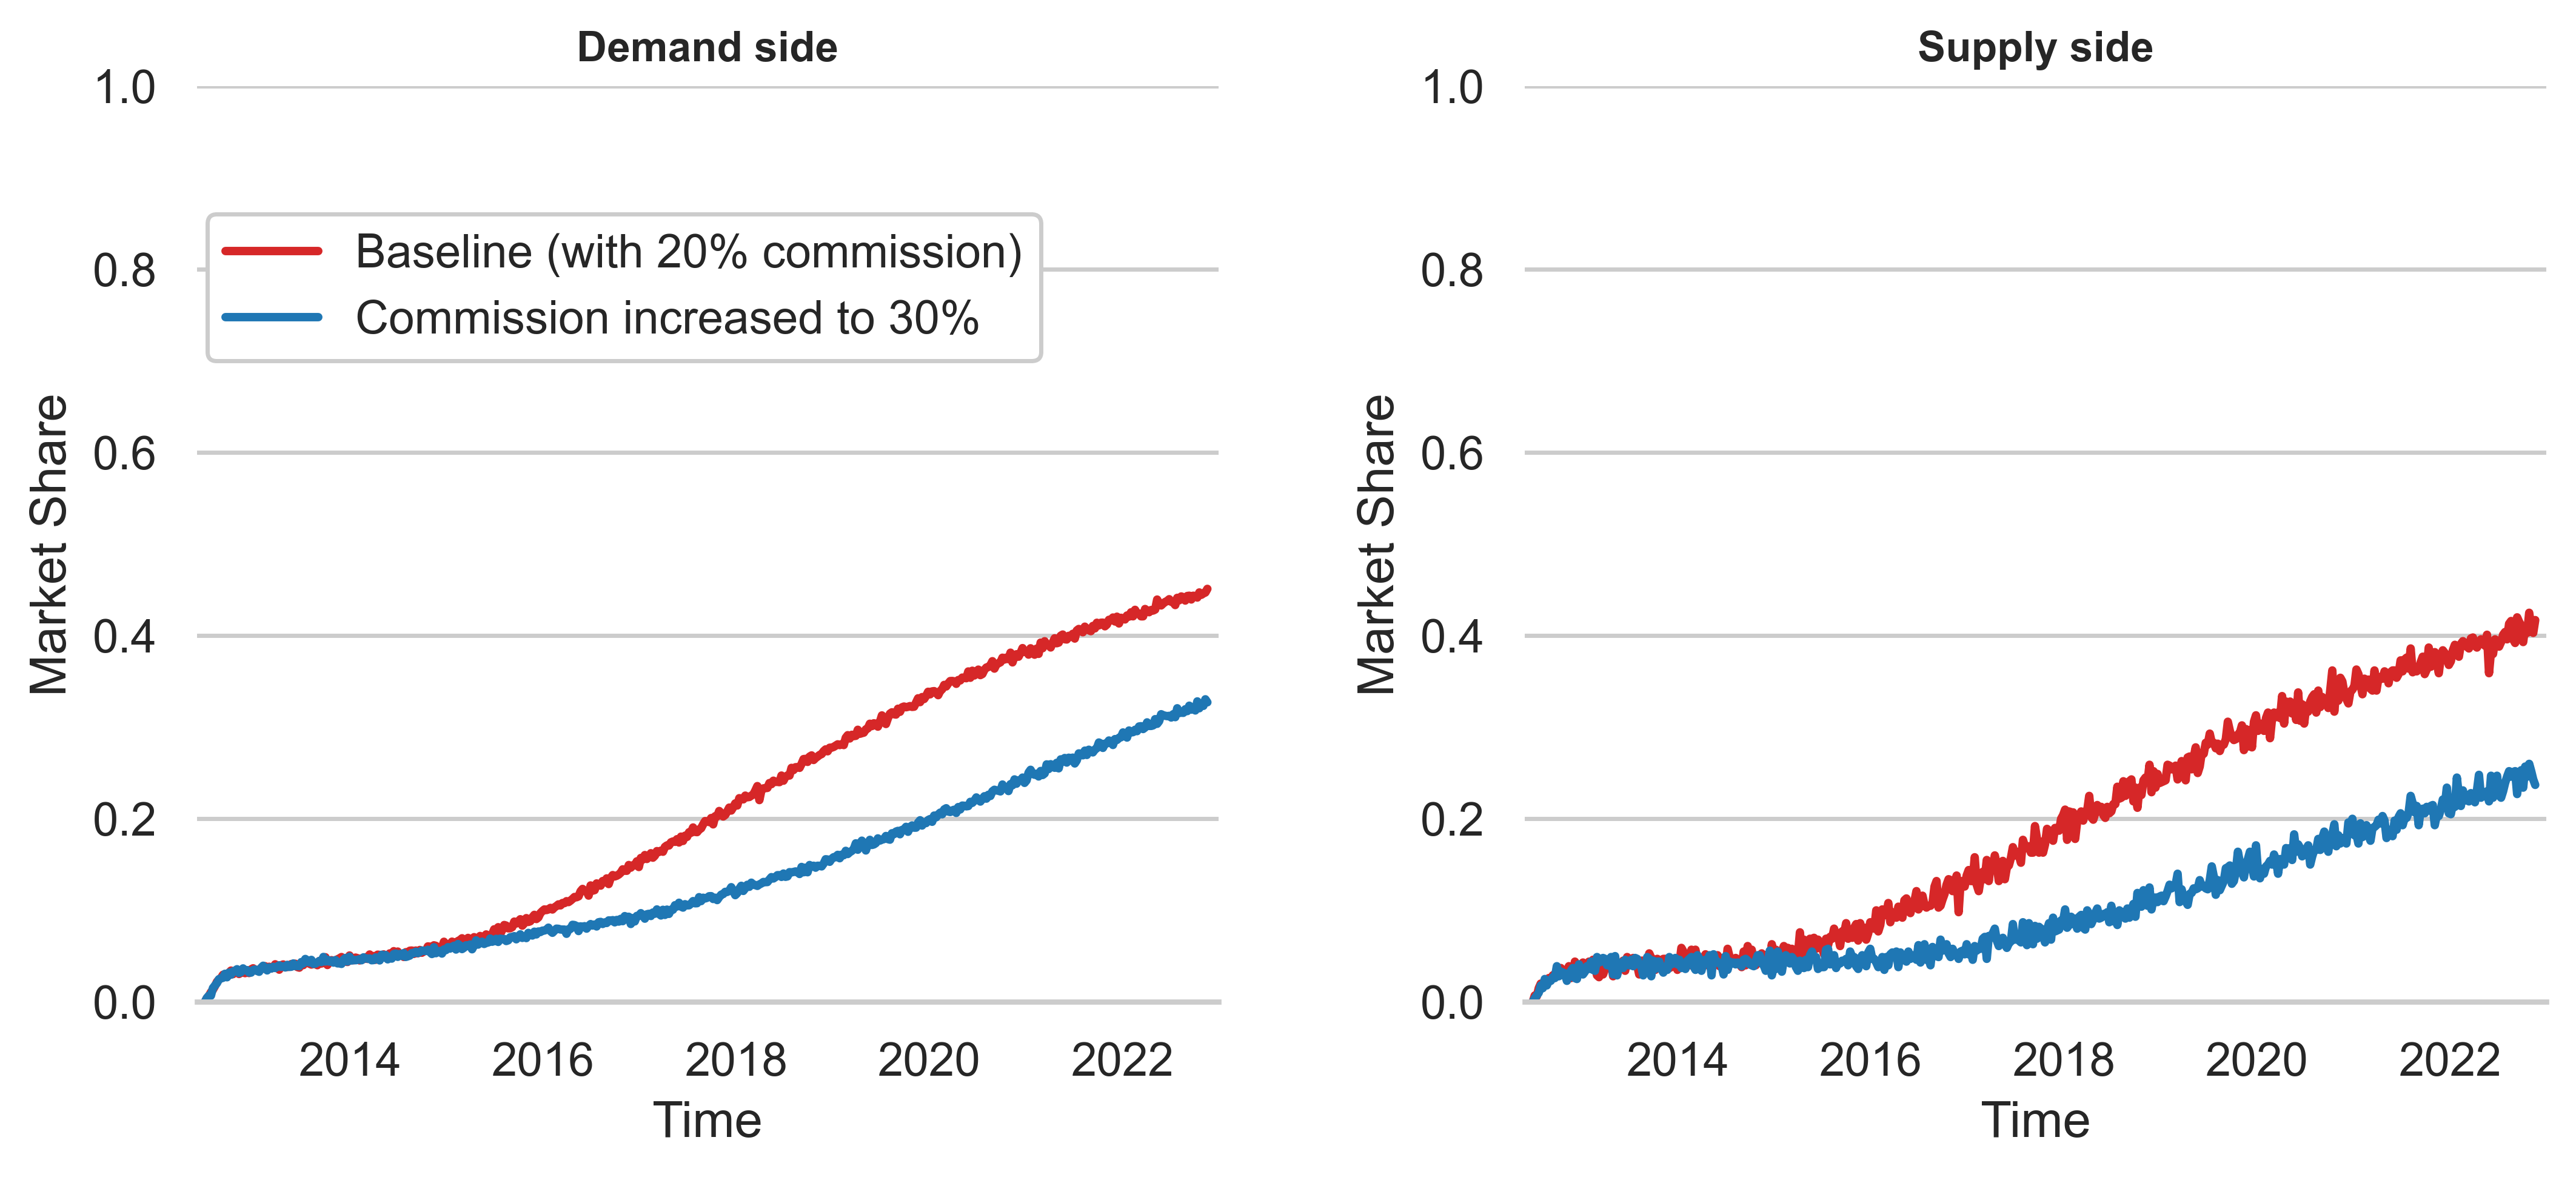

In [127]:
sns.set(rc={"figure.dpi":500, 'savefig.dpi':500})
sns.set(palette='tab10',font_scale=1)#, rc={'axes.facecolor':'lightblue', 'figure.facecolor':'lightgreen'},)
sns.set_style('whitegrid')
fig, ax = plt.subplots(ncols=2, figsize=(10,4))
plt.subplots_adjust(wspace=0.3, hspace=0.4)
sns.despine(left=True)

lw = 2

for row in range(0,2):
    
    lx = [i for i in range(1,nD+1)]
    
    if row==0:
        n=10000; label='Demand side'
        sns.lineplot(x=df_d.date, y=df_d.OUT/n, label = 'Baseline (with 20% commission)', color='C3', lw=lw, ax=ax[row])
        sns.lineplot(x=df_c30_d.date, y=df_c30_d.OUT/n, label = 'Commission increased to 30%', color='C0', lw=lw, ax=ax[row])
        
    elif row==1:
        n = 1000; label='Supply side'
        sns.lineplot(x=df_s.date, y=df_s.OUT/n, label = 'Baseline (with 20% commission)', color='C3', lw=lw, ax=ax[row])
        sns.lineplot(x=df_c30_s.date, y=df_c30_s.OUT/n, label = 'Commission increased to 30%', color='C0', lw=lw, ax=ax[row])
    
    ax[row].grid(axis='x')
    ax[row].set(xlabel='Time', ylabel='Market Share',xlim=(pd.Timestamp('2012-06-01 00:00:00'),pd.Timestamp('2022-12-30 00:00:00')), ylim=(0,1))
    ax[row].xaxis.set_major_locator(mdates.YearLocator(2))
    ax[row].xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
    # ax[row].set_xticks([pd.Timestamp('2012')])
    # [base + datetime.timedelta(years=step*x) for x in range(10)]
    ax[row].set_title(label,fontweight='bold', loc='center',fontsize=10)
    
    
ax[0].legend(frameon=True,framealpha=1, loc=(0.01,0.7))#,  bbox_to_anchor=(0.75, 1.24), ncol=4)
ax[1].get_legend().set_visible(False)